<a href="https://colab.research.google.com/github/Nourhasann/newrepo/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.shape

(6607, 20)

**Data** **Preprocessing**

In [7]:
data.isnull().sum()*100/len(data)

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


In [8]:
data['Teacher_Quality']=data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0])
data['Parental_Education_Level']=data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])
data['Distance_from_Home']=data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])

In [9]:
data.isnull().sum()*100/len(data)    #Now there is no nulls

,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


In [11]:
data.duplicated().sum()     #No Duplicates

np.int64(0)

In [12]:
numeric_col=data.select_dtypes(include=np.number).columns.tolist()
numeric_col

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [15]:
data.sort_values(by = "Exam_Score" , ascending=False).head()   #Sort


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98


In [16]:
data.nunique()


,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


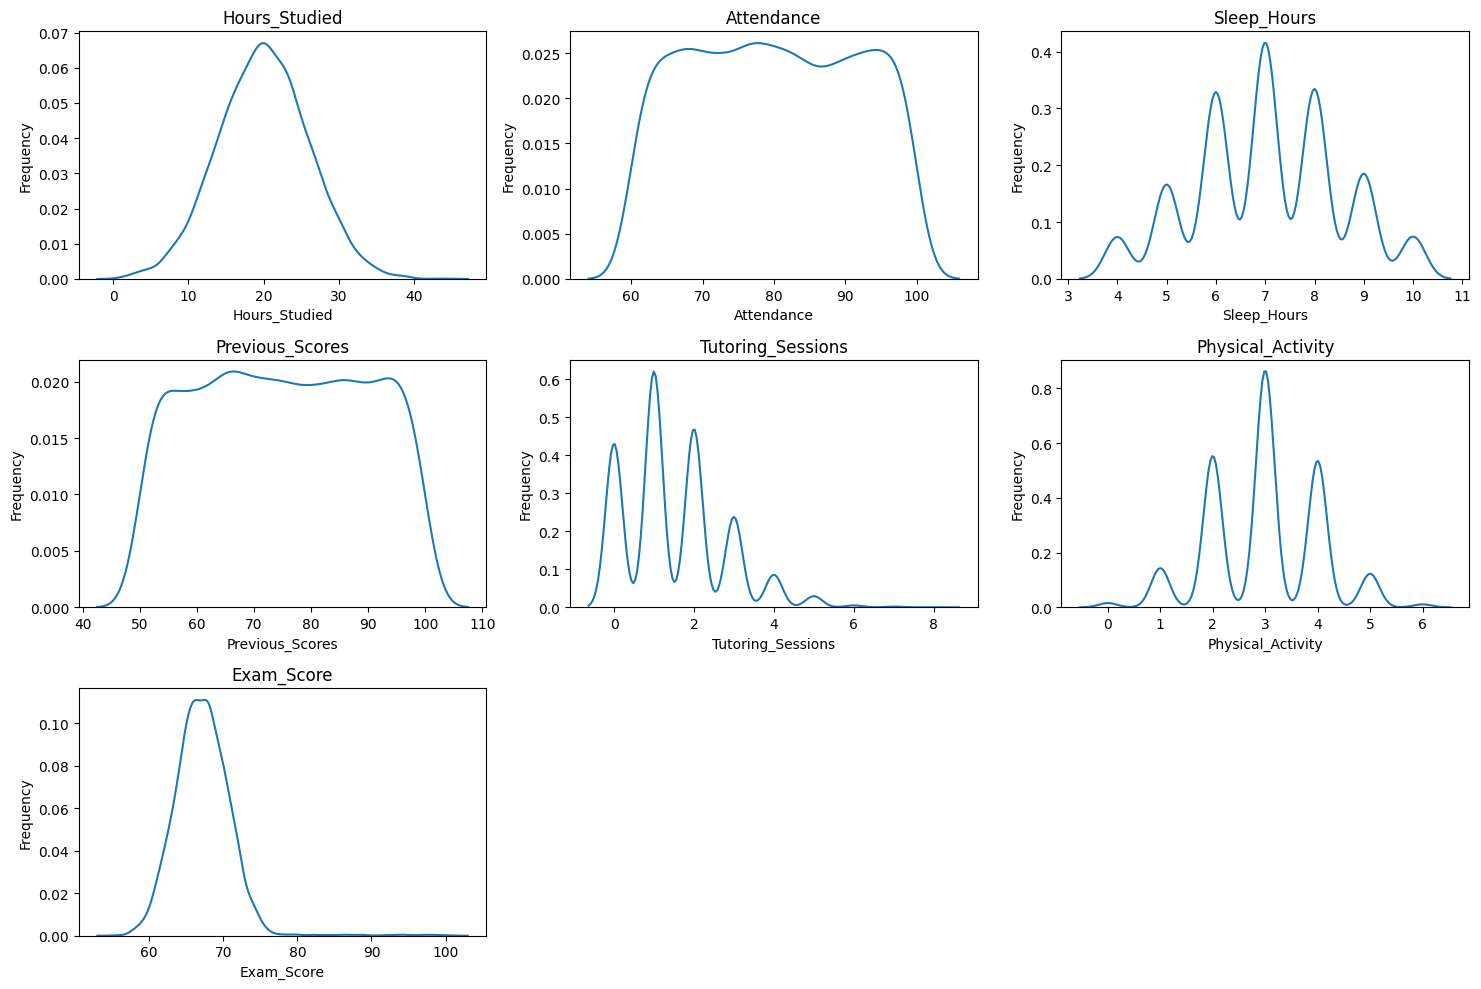

In [17]:
plt.figure(figsize=(15,10))
for col in numeric_col:
  plt.subplot(3,3,numeric_col.index(col)+1)
  sns.kdeplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
plt.show()

In [22]:
for col in numeric_col:     #Handling outliers
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

In [23]:
data.shape

(6054, 20)

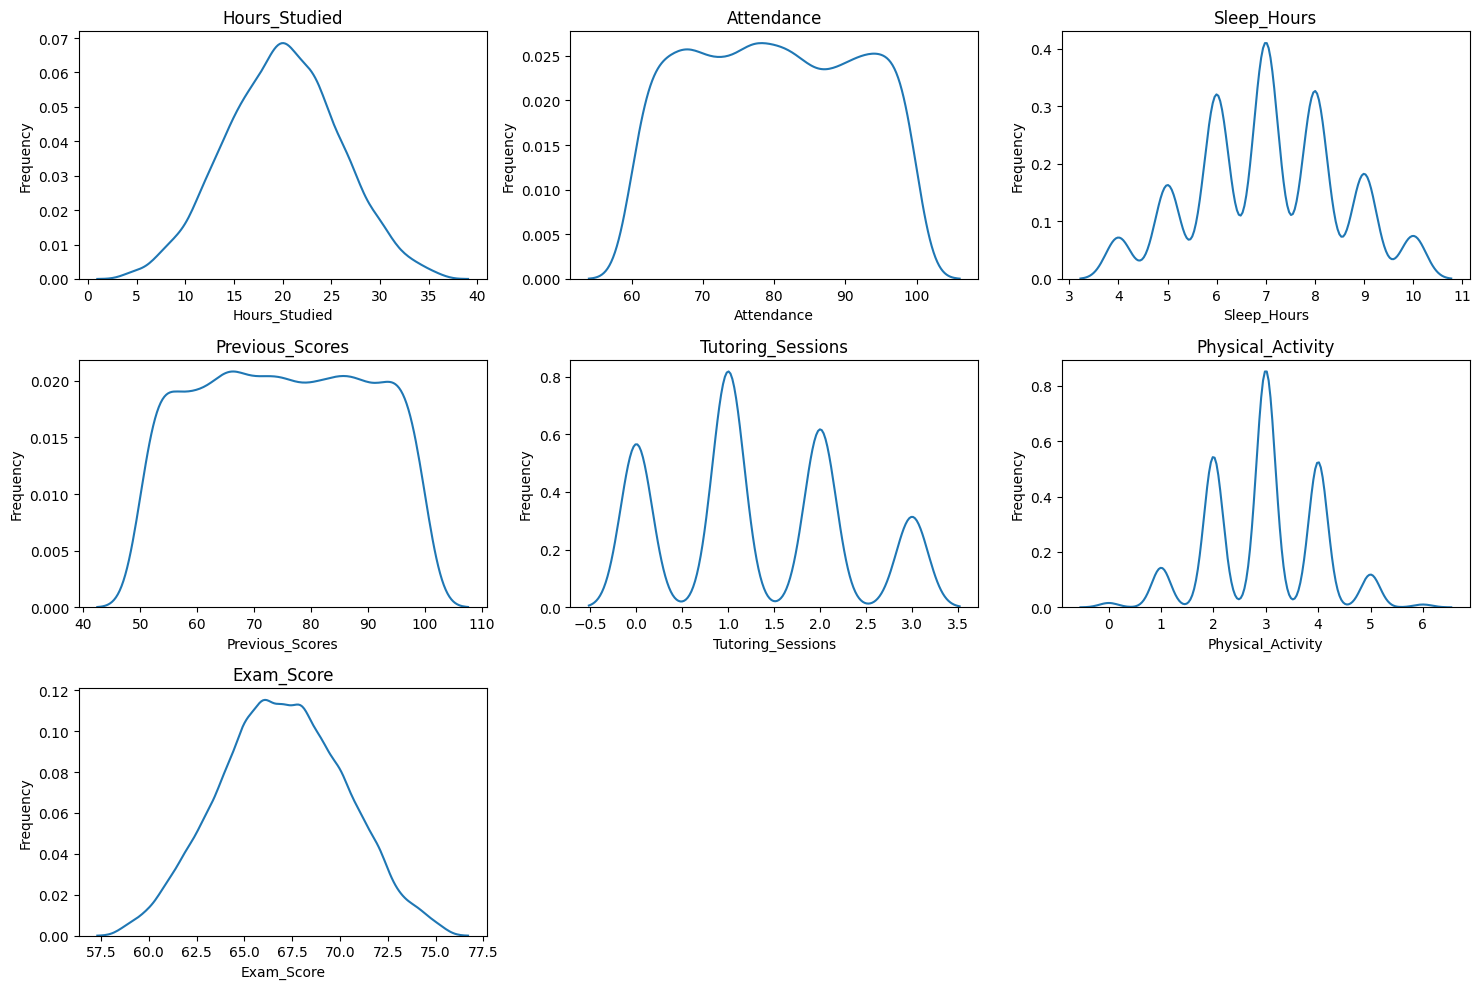

In [25]:
plt.figure(figsize=(15,10))   #After Handling Outliers
for col in numeric_col:
  plt.subplot(3,3,numeric_col.index(col)+1)
  sns.kdeplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
plt.show()

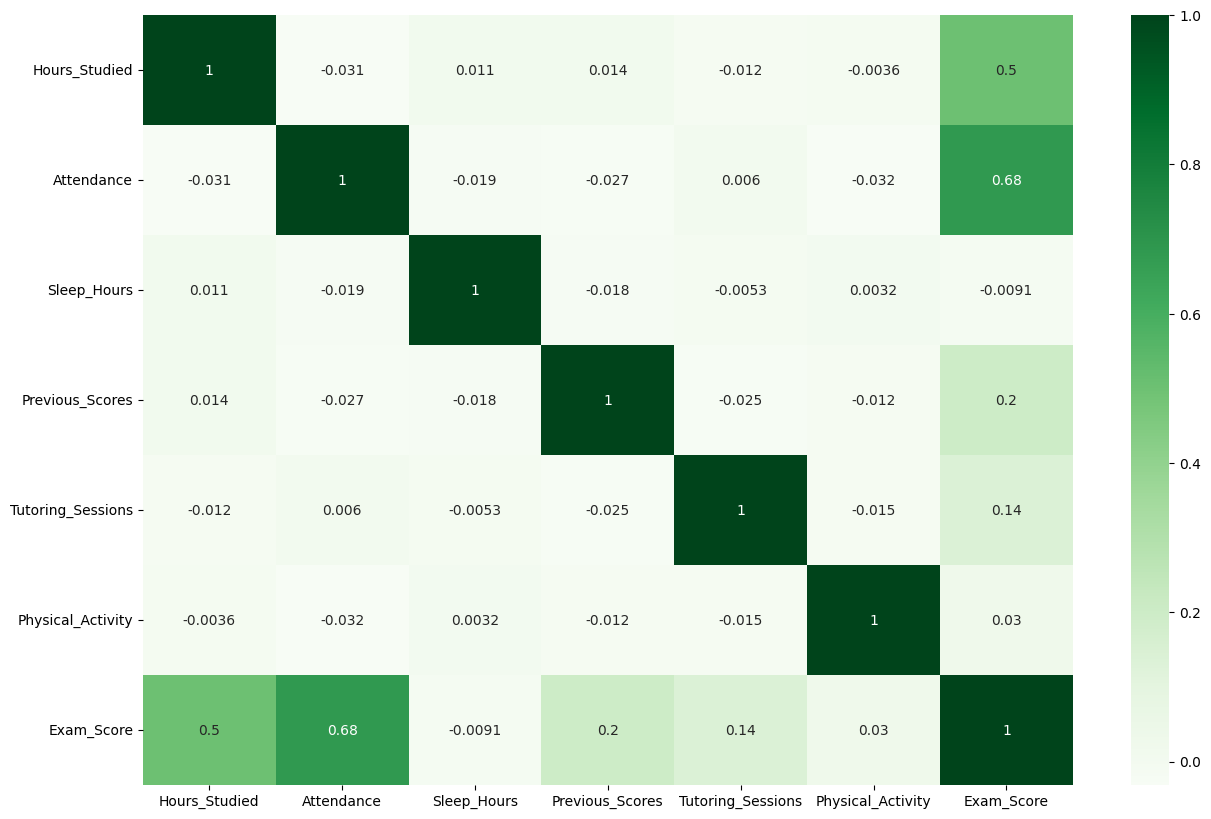

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numeric_col].corr(),annot=True,cmap='Greens')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop(columns=['Hours_Studied','Exam_Score'])
y = data['Exam_Score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

for col in X_train.select_dtypes(include='object'):
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])



In [40]:
X_train.head()

,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5821,98,2,2,0,7,58,2,1,0,2,2,0,1,3,0,1,2,1
5046,73,2,0,1,4,80,1,1,0,1,0,1,1,4,0,0,1,1
3745,74,2,0,1,7,68,2,1,2,1,0,1,0,2,0,1,2,0
6019,78,0,2,0,8,65,2,1,3,2,2,1,2,3,0,0,2,0
1777,74,2,2,1,8,51,0,1,2,2,2,1,0,3,0,0,2,1


In [41]:
X_test.head()

,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
1830,87,1,2,0,6,78,0,1,0,1,1,1,1,2,1,2,2,1
112,71,1,0,1,7,62,0,1,2,2,2,1,0,5,0,0,2,1
3012,95,2,0,1,5,85,2,1,2,0,2,1,0,2,0,0,2,1
284,62,0,2,1,10,78,2,1,0,2,2,0,2,3,0,1,1,0
5958,67,2,2,1,6,84,0,1,1,0,0,1,1,3,0,2,1,0


In [43]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train head after scaling:")
X_train.head()

X_train head after scaling:


,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5821,0.950,2,2,0,0.500000,0.16,2,1,0.000000,2,2,0,1,0.500000,0,1,2,1
5046,0.325,2,0,1,0.000000,0.60,1,1,0.000000,1,0,1,1,0.666667,0,0,1,1
3745,0.350,2,0,1,0.500000,0.36,2,1,0.666667,1,0,1,0,0.333333,0,1,2,0
6019,0.450,0,2,0,0.666667,0.30,2,1,1.000000,2,2,1,2,0.500000,0,0,2,0
1777,0.350,2,2,1,0.666667,0.02,0,1,0.666667,2,2,1,0,0.500000,0,0,2,1


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression Performance:
Mean Absolute Error: 1.6031653911243329
Mean Squared Error: 4.0745861240998105
R-squared: 0.6199250520581931


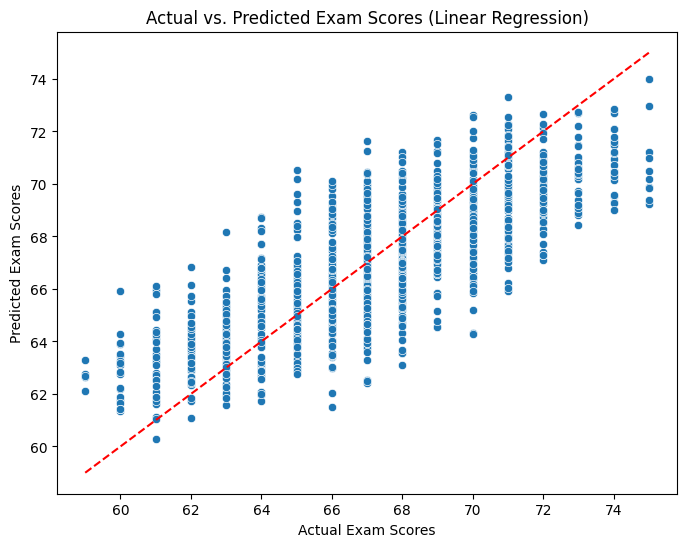

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores (Linear Regression)")

# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("PolynomialRegression")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression
MAE: 1.44
R-squared: 0.70


**Polynomial Regression model is better**